In [62]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt

In [63]:
f_max = 100
Ns = 200
n = np.arange(0,Ns)

In [64]:
c = np.sqrt(2/Ns)
f = f_max * np.sin(np.pi/(2*Ns)*(n-1/2))
theta = 2 * np.pi * np.random.rand(Ns)

In [65]:
print(n.shape, f.shape, theta.shape)

(200,) (200,) (200,)


In [66]:
T = 2
Ts = 0.0001
Fs = 1/Ts
num_samples = int(T/Ts)
t = Ts * np.arange(0,num_samples)
num_samples

20000

In [67]:
mu = 0
for i in range(Ns):
    mu = mu + (c * np.cos((2 * np.pi * t * f[i]) + theta[i]))

mu.shape

(20000,)

(-150.0, 150.0)

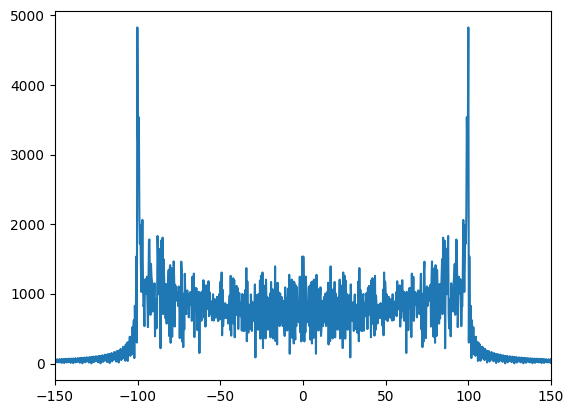

In [68]:
Nfft =int(2**np.ceil(np.log2(num_samples)))
freq = (Fs/Nfft) * np.arange((-Nfft/2), (Nfft/2))

spectrum = np.fft.fftshift(np.fft.fft(mu,Nfft))
plt.plot(freq,np.abs(spectrum))
plt.xlim(-f_max-50,f_max+50)

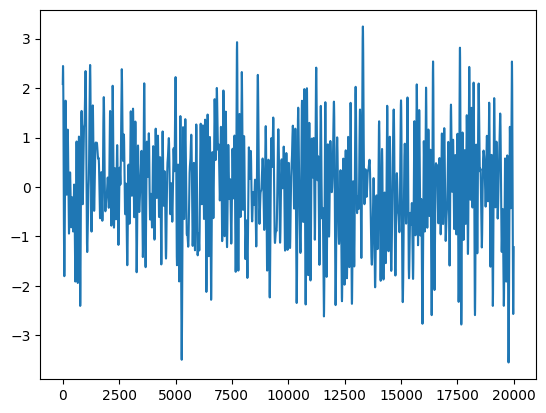

In [69]:
plt.plot(mu)

In [70]:
from scipy.special import erfinv

In [71]:
Fc = 1000
f_g = Fc / (np.sqrt(np.log(2)) * erfinv((2*n-1)/(2*Ns)))

In [72]:
mu_g = 0
for i in range(Ns):
    mu_g = mu_g + (c * np.cos((2 * np.pi * t * f_g[i]) + theta[i]))

mu_g.shape

(20000,)

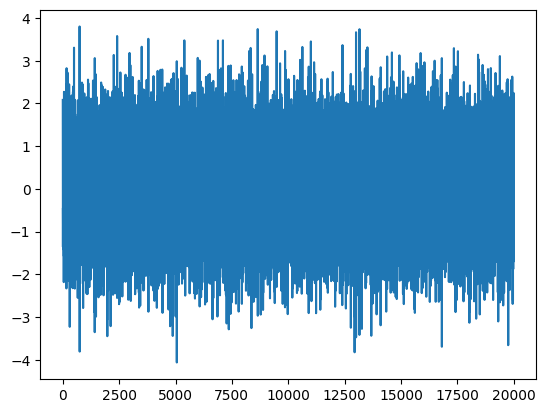

In [73]:
plt.plot(mu_g)

(-150.0, 150.0)

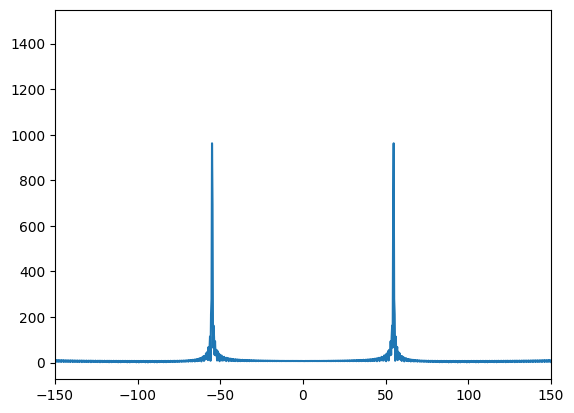

In [83]:
spectrum = np.fft.fftshift(np.fft.fft(mu_g,Nfft))
plt.plot(freq,np.abs(spectrum))
plt.xlim(-f_max-50,f_max+50)

# autocorr

In [75]:
#theoretical
r = 0
for i in range(Ns):
    r = r + ( ((c**2) / 2) * (np.cos(np.pi * 2 * f[i] * t)) )

r.shape

(20000,)

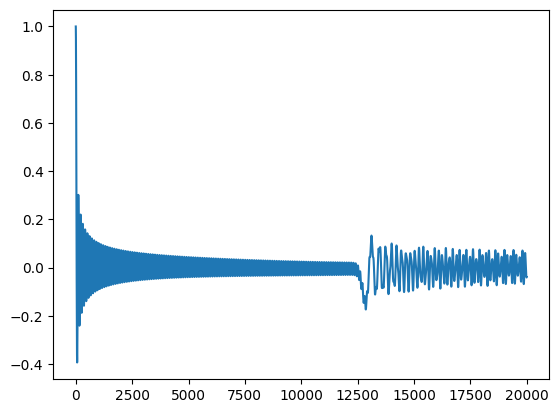

In [84]:
plt.plot(r)

(0.0, 3000.0)

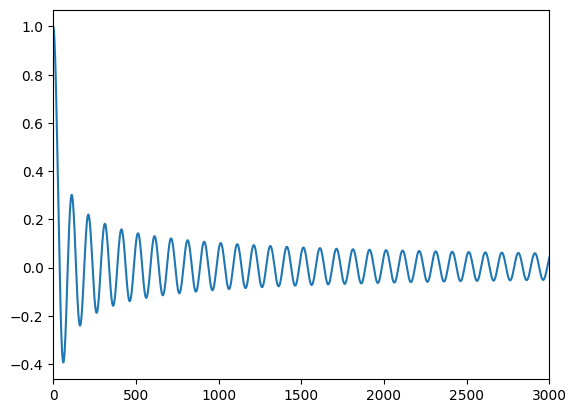

In [86]:
plt.plot(r)
plt.xlim(0,3000)

In [77]:
#computationally
def autocorrelation(vector):
    """
    Calculate the autocorrelation of a vector.
    
    Parameters:
    vector (numpy.array): The input vector for which autocorrelation is calculated.

    Returns:
    numpy.array: Autocorrelation of the vector.
    """
    # Normalizing by the length of the vector to maintain consistency
    n = len(vector)
    result = np.correlate(vector, vector, mode='full') / n
    # Taking the second half of the result, since autocorrelation is symmetric
    return result[result.size // 2:]

auto_corr = autocorrelation(mu)

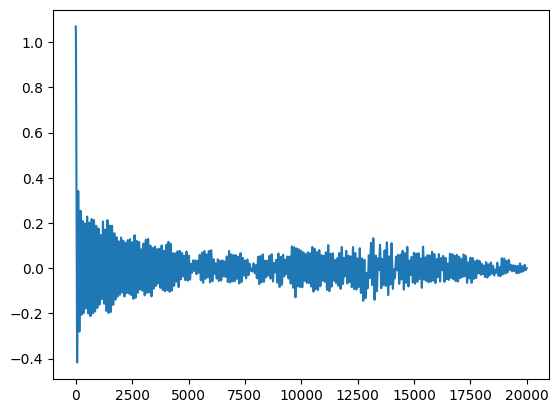

In [87]:
plt.plot(auto_corr)

(0.0, 3000.0)

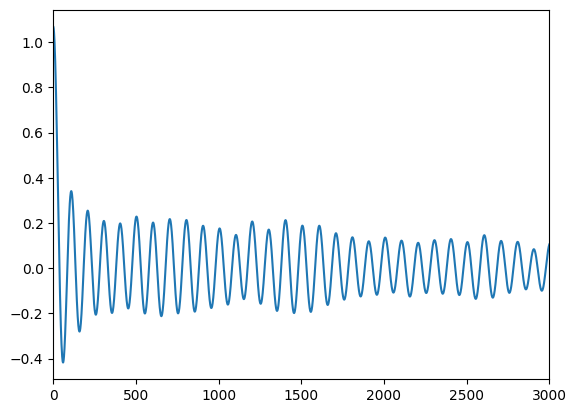

In [89]:
plt.plot(auto_corr)
plt.xlim(0,3000)

In [79]:
def discrete_convolution_same(signal, kernel):
    """
    Perform discrete convolution (same length) between a signal and a kernel.

    Parameters:
    signal (list or numpy.array): The input signal.
    kernel (list or numpy.array): The kernel (or filter) to convolve with the signal.

    Returns:
    list: The result of the convolution, with the same length as the input signal.
    """
    len_signal = len(signal)
    len_kernel = len(kernel)


    # Calculate the number of zeros to pad on each side of the signal
    padding = (len_kernel - 1) // 2

    # Pad the signal with zeros
    padded_signal = np.pad(signal, (len_kernel - 1 - padding, padding), 'constant')

    # Initialize the output array with zeros
    output = [0] * len_signal

    # Perform convolution using np.dot
    for i in range(len_signal):
        output[i] = np.dot(padded_signal[i:i+len_kernel], kernel[::-1])

    return output

In [80]:
# Example usage
signal = np.random.randn(1000)
kernel = np.array([1, 0, -1, 0,-90,88])
convolved_same = discrete_convolution_same(signal, kernel)
npc = np.convolve(kernel, signal, 'same')
#print("Convolved Signal (Same Length):", convolved_same)
#print(np.convolve(kernel, signal, 'same'))
print(np.array_equal(npc,convolved_same))
print(len(npc),len(convolved_same))

True
1000 1000


In [81]:
def filter_CIR(self, CIR):
    '''
    Takes the Channel Impulse Response and convolves it with the input signal to produce the output signal
    The CIR is a 2D array with every row representing the channel profile at a time instant
    If the CIR is 1D array the channel is said to be in Block fading
    '''

    def myconv():
        '''
        Implementation of the convolution function for Linear Time-Varying system
        In the context of wireless channel modelling, channel coefficients could be:
        - constant for the block interval (block faded) 
        - changing every defined coherence time or ratio of block
        - changing every time instant (extreme case)
        '''
        pass

    output_signal = np.zeros_like(self.ip_signal)
    for n in range(self.num_samples):
        current_output = np.convolve(self.ip_signal, CIR[n, :]) #to be replaced with a more efficient solution
        output_signal[n] = current_output[n]

    return output_signal